# Prediction des défauts de paiement de cartes de crédit

Nous allons utiliser le jeu de données "Default of Credit Card Clients" disponible sur le site [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients). Source: Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

Ce jeu de données contient des informations sur les défauts de paiement, les facteurs démographiques, les données de crédit, l'historique des paiements et les factures de cartes de crédit de 30 000 clients à Taiwan d'avril 2005 à septembre 2005.

Le jeu de données contient 25 variables :

- **ID** : ID client
- **LIMIT_BAL** : Limite max du crédit accordé en dollar NT
- **SEX** : Le genre du client (1 = homme, 2 = femme)
- **EDUCATION** : Niveau d'éducation (1 = cycle master/doctorat, 2 = université, 3 = lycée, 4 = autre)
- **MARRIAGE** : Etat matrimonial (1 = marié, 2 = célibataire, 3 = autre)
- **AGE** : Age
- **PAY_0** : Etat de remboursement en septembre 2005 (-1 = paiement effectué, 1 = paiement en retard de 2 mois, ..., 9 = paiement en retard de 9 mois et plus)
- **PAY_2** : Etat de remboursement en août 2005
- **PAY_3** : Etat de remboursement en juillet 2005
- **PAY_4** : Etat de remboursement en juin 2005
- **PAY_5** : Etat de remboursement en mai 2005
- **PAY_6** : Etat de remboursement en avril 2005
- **BILL_AMT1** : Montant de la facture en septembre 2005 (en dollar NT)
- **BILL_AMT2** : Montant de la facture en août 2005
- **BILL_AMT3** : Montant de la facture en juillet 2005
- **BILL_AMT4** : Montant de la facture en juin 2005
- **BILL_AMT5** : Montant de la facture en mai 2005
- **BILL_AMT6** : Montant de la facture en avril 2005
- **PAY_AMT1** : Montant du paiement précédent en septembre 2005 (en dollar NT)
- **PAY_AMT2** : Montant du paiement précédent en août 2005
- **PAY_AMT3** : Montant du paiement précédent en juillet 2005
- **PAY_AMT4** : Montant du paiement précédent en juin 2005
- **PAY_AMT5** : Montant du paiement précédent en mai 2005
- **PAY_AMT6** : Montant du paiement précédent en avril 2005
- **default.payment.next.month** : Défaut de paiement en mai 2005 (1 = oui, 0 = non)

## Preprocessing
Le jeu de données est au format XLS, nous allons le convertir en CSV pour pouvoir l'utiliser. On va également supprimer la première ligne qui contient les noms des colonnes (X1,...,Y).

Je commence par installer xlrd pour pouvoir lire le fichier XLS:
<br>
<br>

In [2]:
import sys

import numpy as np
!{sys.executable} -m pip install xlrd

In [3]:
import pandas as pd

# on enlève la première ligne qui contient les noms des colonnes et la première colonne qui contient les ID :
df = pd.read_excel('default of credit card clients.xls', skiprows=[0], usecols="B:Y")
df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)
df.rename(columns={'default payment next month': 'DEFAULT'}, inplace=True)
df.to_csv('default_credit_card_clients.csv', index=False)

<br>
On peut maintenant lire notre fichier CSV, voici les 5 premières lignes : <br>

In [4]:
df = pd.read_csv('default_credit_card_clients.csv')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

<br>
On peut constater que le jeu de données a <b>30.000 lignes</b>, il a désormais <b>24 colonnes</b>, et il ne possède que des <b>valeurs numériques</b> (int).

Notre classe d'intérêt est <code>DEFAULT</code>, c'est la classe que l'on devra prédire. Comme énoncé plus haut, 1 signifie que le client est en situation de défaut de paiement, 0 signifie que le client a bien réglé ses factures. <br>
Vérifions maintenant que notre fichier ne possède pas de valeurs manquantes : <br>

In [5]:
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

On va maintenant explorer nos données pour voir ce qu'il s'y passe. On va commencer par regarder la répartition de notre classe d'intérêt <code>default</code> : <br>

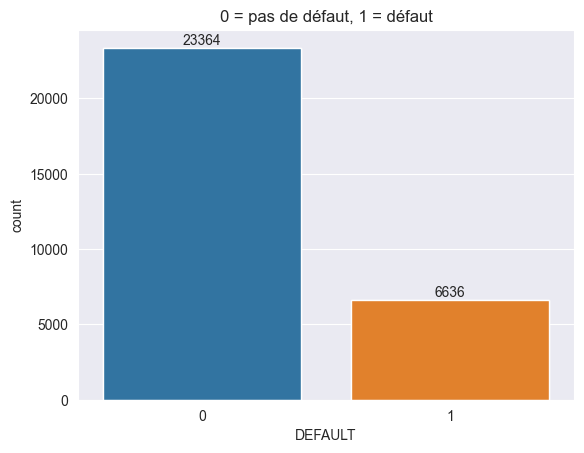

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='DEFAULT', data=df).bar_label(sns.countplot(x='DEFAULT', data=df).containers[0])
plt.title('0 = pas de défaut, 1 = défaut')
plt.show()

On constate que nos données sont déséquilibrées. Il y a beaucoup plus de clients qui ont réglé leurs factures (<b>23364</b>/<b>77.8%</b>) que de clients en situation de défaut de paiement (<b>6636</b>/<b>22.2%</b>).

Regardons la matrice de correlation :
<br>

Text(0.5, 1.0, 'Matrice de correlation')

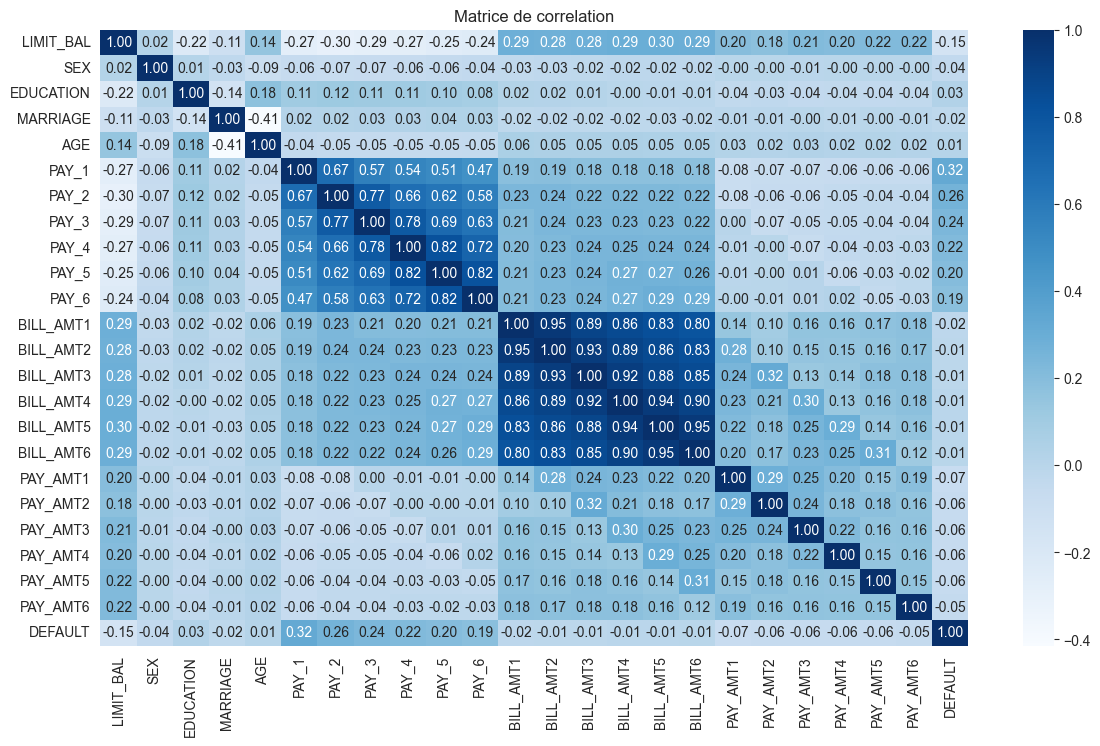

In [7]:
corr = df.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')
plt.title('Matrice de correlation')

On constate plusieurs choses ici :
- les variables <code>PAY_1</code> à <code>PAY_6</code> ont les correlations positives les plus élevées avec <code>default</code>. La valeur la plus élevée est de <code>0.32</code> pour <code>PAY_1</code>.
- la variable <code>LIMIT_BAL</code> a une correlation de <code>0.15</code> avec <code>default</code>, c'est la corrélation négative la plus élevée.
- les variables <code>PAY_AMT1</code> à <code>PAY_AMT6</code> ont, elles aussi, des correlations négatives avec <code>default</code>.
- les variables <code>BILL_AMT*</code> et <code>PAY_AMT*</code> sont fortement corrélées entre elles au fil des mois, <code>BILL_AMT*</code> l'est encore plus que <code>PAY_AMT*</code>.

Cela signifie pour le premier élément que plus les paiements ont de retard, plus le risque de défaut de paiement est élevé, <code>PAY_1</code> est <b>la variable la plus prédictive</b> du défaut de paiement. Ensuite, plus le montant du crédit accordé est élevé et moins il y a de risque de défaut de paiement. Les montants des paiements précédents ont quant à eux peu d'incidence sur le défaut de paiement.
<br>
<h3>Hypothèses</h3>
L'expression "on ne prête qu'aux riches" semble s'appliquer ici, dans la vie réelle les montants élevés de crédit ne sont généralement accordés qu'aux personnes ayant le plus de garanties de le rembourser, en effet les banquiers effectuent de fortes vérifications lorsque la demande de crédit est élevée. Il n'en est pas de même pour les petits montants, on peut penser aux crédits à la consommation, ainsi les données que nous avons confirment qu'en effet, plus le crédit autorisé sur la carte est élevé, plus le risque de défaut de paiement est faible, les clients possédant ces crédits élevés sont plus à même de parvenir à les rembourser contrairement aux clients effectuant de petits crédits.

Voici la répartition des clients en situation de défaut de paiement par rapport à leur limite de crédit :

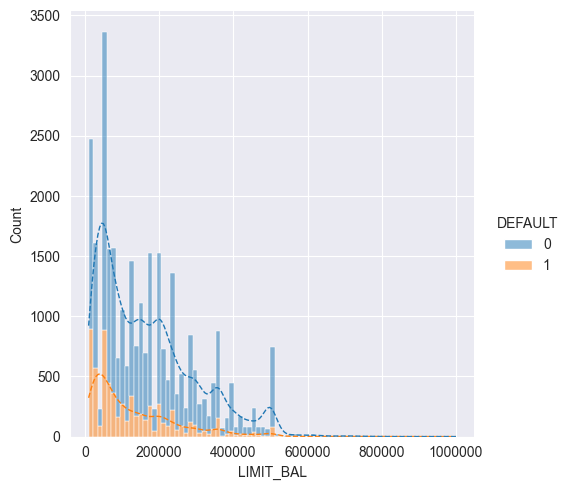

In [8]:
sns.displot(data=df, x="LIMIT_BAL", hue="DEFAULT", multiple="stack", stat='count', kde=True, line_kws={'ls':'--', 'lw':1})
plt.ticklabel_format(style="plain")

Concernant les variables relatives aux délais de remboursement, on a constaté que le premier retard de paiement était un très fort indicateur du défaut de paiement. Ce premier retard est ainsi un fort signal aux banquiers sur la possible insolvabilité du client, tous les retards suivants confirment que le risque de défaut du client est élevé. Les banquiers devraient ainsi particulièrement être attentifs à ces retards de paiement.

Enfin, concernant les variables <code>BILL_AMT*</code> et <code>PAY_AMT*</code>, il y a un lien logique entre les montants des factures et leur paiement d'un mois à l'autre.
<br>

<h3>Analyse du profil des clients</h3>
Etudions les données des clients pour mieux comprendre les facteurs susceptibles d'indiquer un défaut de paiement à venir.

Commençons par l'élément ayant la corrélation positive la plus élevée : <code>PAY_1</code>

<h4>Etat de remboursement</h4>
Voici le taux de défaut de paiement au sein de <code>PAY_1</code> :

In [9]:
pay_mean = df.groupby('PAY_1').agg({'DEFAULT':'mean'})
print(pay_mean * 100)

         DEFAULT
PAY_1           
-2     13.229431
-1     16.778051
 0     12.811291
 1     33.947939
 2     69.141357
 3     75.776398
 4     68.421053
 5     50.000000
 6     54.545455
 7     77.777778
 8     57.894737


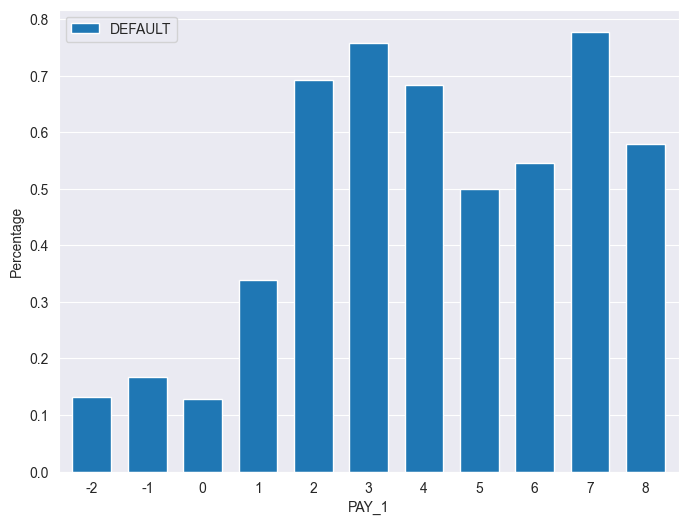

In [10]:
ax = pay_mean.plot.bar(figsize=(8,6), width=0.7)
ax.set_ylabel("Percentage")
ax.grid(axis='x')
plt.xticks(rotation=0)
plt.show()

On remarque des valeurs qui n'ont pas été documentées dans le dataset original : <b>-2</b> et <b>0</b>.

Il semblerait que -2 signifie qu'il n'y a pas de crédit à rembourser et que 0 signifie qu'un paiement a été fait, mais pas en intégralité.

Nous constatons ainsi une fois encore que le retard de paiement est effectivement un marqueur très important de l'état de défaut de paiement à venir, 69% des clients qui ont eu 2 mois de retard sont en situation de défaut.

Regardons maintenant l'éducation des clients:

<h4>Niveau d'éducation</h4>

In [11]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

On constate ici aussi que les valeurs 0, 5 et 6 ne sont pas documentées dans le dataset original. On va donc placer les valeurs non documentées dans la catégorie 4, qui est "autre" (others) :

In [12]:
df['EDUCATION'] = df['EDUCATION'].replace([0, 5, 6], 4)
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

Tout est bon désormais, pour rappel :
- 1 = master/doctorat (graduate school)
- 2 = études universitaires (university)
- 3 = lycée (high school)
- 4 = autres (others)

On va maintenant regarder la répartition des clients selon leur niveau d'éducation :

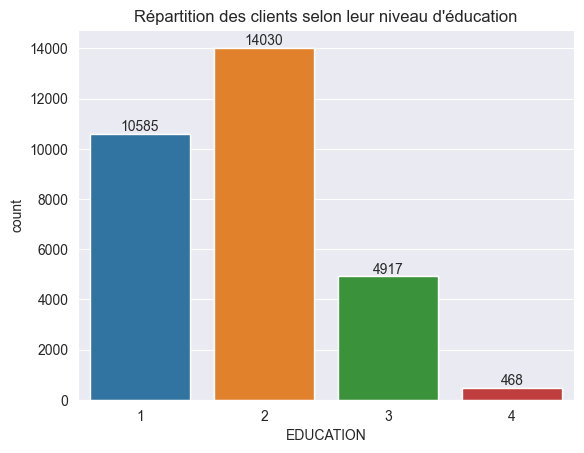

In [13]:
sns.countplot(x='EDUCATION', data=df).bar_label(sns.countplot(x='EDUCATION', data=df).containers[0])
plt.title('Répartition des clients selon leur niveau d\'éducation')
plt.show()

On constate que la majorité des clients ont un niveau d'éducation de 2 (études universitaires), suivi par 1 (master/doctorat) et 3 (lycée). Les clients ayant un niveau d'éducation de 4 (autres) sont très peu nombreux.

Regardons maintenant la répartition de ces clients selon leur situation de défaut de paiement :

<Axes: xlabel='EDUCATION'>

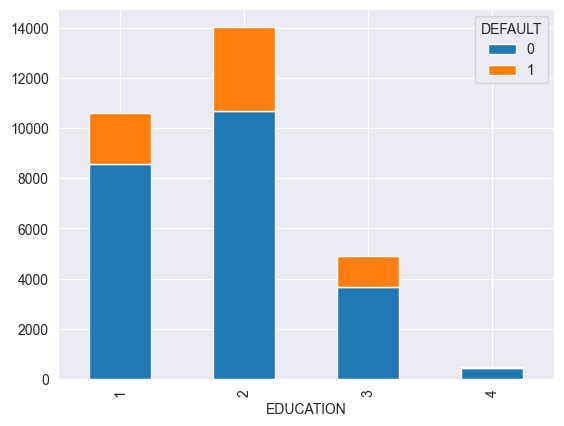

In [14]:
pd.crosstab(df['EDUCATION'], df['DEFAULT']).plot.bar(stacked=True)

In [15]:
# On va maintenant calculer le taux de défaut de paiement pour chaque niveau d'éducation
education_mean = df.groupby('EDUCATION').agg({'DEFAULT':'mean'})
print(education_mean * 100)

             DEFAULT
EDUCATION           
1          19.234766
2          23.734854
3          25.157616
4           7.051282


On constate que les clients ayant un niveau d'éducation de 1 (master/doctorat) ont le taux de défaut de paiement le plus élevé (à part pour la catégorie "Other").

Les clients ayant un niveau d'éducation de 3 (lycée) ont le taux de défaut de paiement le plus faible, suivi par les clients ayant effectué des études universitaires.

Regardons maintenant les données concernant le genre, pour rappel 1 = homme, 2 = femme :

<h4>Genre</h4>

In [16]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

<Axes: xlabel='SEX'>

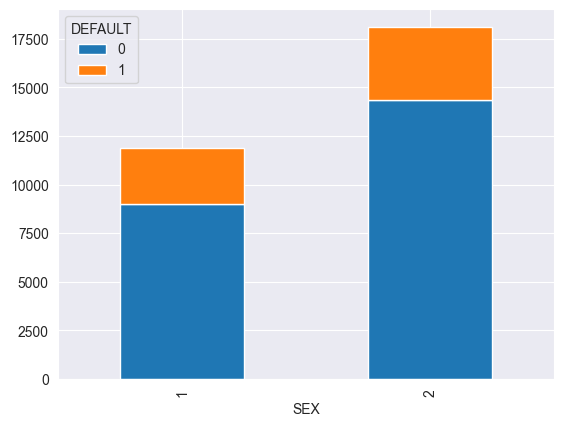

In [17]:
pd.crosstab(df['SEX'], df['DEFAULT']).plot.bar(stacked=True)

In [18]:
gender_mean = df.groupby('SEX').agg({'DEFAULT':'mean'})
print(gender_mean * 100)

       DEFAULT
SEX           
1    24.167227
2    20.776281


On constate que les femmes ont un taux de défaut de paiement plus élevé que les hommes.

Regardons maintenant les données concernant l'âge :

<h4>Âge</h4>

In [19]:
df['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

On constate que l'âge minimum est de 21 ans et l'âgee maximum est de 79 ans. L'âge moyen est quant à lui de 35 ans.

Regardons maintenant la répartition  des clients en situation de défaut de paiement par rapport à leur âge :

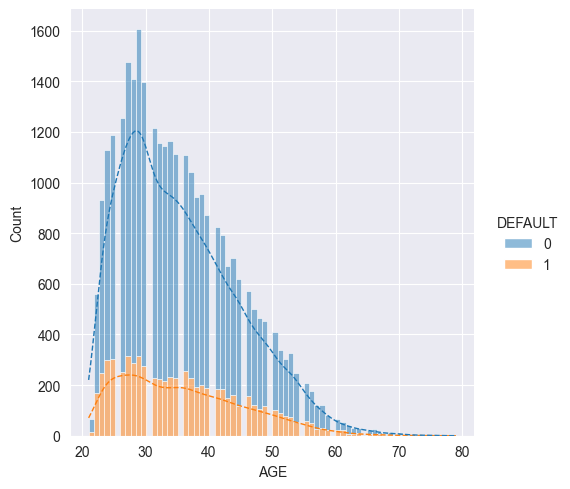

In [20]:
sns.displot(data=df, x="AGE", hue="DEFAULT", multiple="stack", stat='count', kde=True, line_kws={'ls':'--', 'lw':1})

In [21]:
age_mean = df.groupby('AGE').agg({'DEFAULT':'mean'}).sort_values(ascending=False, by='DEFAULT')
print(age_mean * 100)

       DEFAULT
AGE           
73   75.000000
61   37.500000
60   34.328358
75   33.333333
72   33.333333
67   31.250000
22   30.178571
64   29.032258
66   28.000000
46   27.543860
56   27.528090
55   27.272727
24   26.619343
23   26.530612
49   26.327434
51   25.882353
63   25.806452
52   25.657895
25   25.463744
58   25.409836
59   25.301205
50   24.574209
47   23.952096
42   23.299748
44   23.142857
36   22.924188
53   22.769231
54   22.672065
41   22.451456
43   22.388060
48   22.317597
57   22.131148
37   21.998079
40   21.494253
27   21.191605
21   20.895522
39   20.859539
65   20.833333
38   20.550847
35   20.305481
28   20.298084
26   20.143312
68   20.000000
69   20.000000
70   20.000000
34   19.879518
30   19.641577
29   19.501558
32   19.430052
31   18.816763
45   18.800648
33   18.760908
62   15.909091
71    0.000000
74    0.000000
79    0.000000
